# Real Estate Price Modeling using ML

<b>AUTHOR: </b>Michelle Nemiada

<b>DESCRIPTION: </b> Using ML models to predict property prices in Bengaluru. Bengaluru (also called Bangalore) is the capital of India's southern Karnataka state.

<b>DATA SOURCE: </b>https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data


<b>DATE CREATED: </b>March 16, 2022<br/>
<b>LAST MODIFIED: </b>March 23, 2022

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Real-Estate-Price-Modeling-using-ML" data-toc-modified-id="Real-Estate-Price-Modeling-using-ML-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Real Estate Price Modeling using ML</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Quick-stats-of-the-available-features" data-toc-modified-id="Quick-stats-of-the-available-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quick stats of the available features</a></span></li></ul></li><li><span><a href="#Data-processing-and-Imputation" data-toc-modified-id="Data-processing-and-Imputation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data processing and Imputation</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove Outliers</a></span></li><li><span><a href="#Create-dummy-variables" data-toc-modified-id="Create-dummy-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create dummy variables</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Model-Predictions-Deep-Dive" data-toc-modified-id="Model-Predictions-Deep-Dive-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Predictions Deep Dive</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Predicted-vs-True-Values" data-toc-modified-id="Predicted-vs-True-Values-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Predicted vs True Values</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#SHAP-Value" data-toc-modified-id="SHAP-Value-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SHAP Value</a></span></li></ul></li></ul></li></ul></div>

<small><i>Note: Hyperlinks may not work on GitHub rendered notebooks.</i></small>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
import itertools
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import modeling_mn as modelutil

# Load Data

In [3]:
data_raw = pd.read_csv('data/Bengaluru_House_Data.csv')

In [4]:
data_raw.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1081,Super built-up Area,17-Oct,Banashankari,3 BHK,NaN,1470,2.0,1.0,88.64
3514,Built-up Area,Ready To Move,Ambedkar Nagar,4 BHK,SoechHa,3530,4.0,2.0,290.00
10383,Super built-up Area,17-May,Sarjapur Road,3 BHK,Ahriaup,1881,3.0,2.0,145.00
8262,Super built-up Area,18-Dec,Kannamangala,3 BHK,Sonue A,1536,3.0,1.0,104.00
4725,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1735,3.0,2.0,72.00
1177,Super built-up Area,Ready To Move,Ambalipura,3 BHK,SJarkte,1390,2.0,1.0,175.00
1827,Plot Area,Ready To Move,Hebbal Kempapura,2 Bedroom,NaN,1200,2.0,1.0,125.00
2054,Super built-up Area,Ready To Move,Kanakpura Road,3 BHK,SoapeSu,1420,2.0,2.0,75.00
8456,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Rehtsna,1881,3.0,NaN,95.00
879,Super built-up Area,Ready To Move,Hosur Road,3 BHK,Sueneu,1145,2.0,2.0,60.00


In [5]:
data_raw.shape

(13320, 9)

## Quick stats of the available features

We'll look at the value counts and summary statistics for each variable. By doing so, we get an idea of which variables are worth keeping, which have a lot of nulls, which we can impute, and which needs some feature engineering.

In [6]:
for col in data_raw.columns:
    val_cnts = data_raw[col].fillna('NaN').value_counts()
    print("{} \n{}\n\n{}".format(col, val_cnts, val_cnts.describe().to_frame()), 
                            end='\n\n====================\n')

area_type 
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

         area_type
count     4.000000
mean   3330.000000
std    3779.921428
min      87.000000
25%    1540.500000
50%    2221.500000
75%    4011.000000
max    8790.000000

availability 
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

       availability
count     81.000000
mean     164.444444
std     1173.624354
min        1.000000
25%        3.000000
50%       10.000000
75%       29.000000
max    10581.000000

location 
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra   

Based on how the data looks, we can make the following adjustments:
* the `area_type` is categorical; use one-hot encoding
* the `availability` can be reduced to a binary variable: (available or not)
* `location` can be reduced by categorizing entries with <10 (mean) frequency to 'Other'
* get the int part of the `size` column; nulls can be dropped
* `society` has a lot of nulls: drop the entire column
* `total_sqft` has some values not in sqft.: convert these rows to sqft
* `bath`: impute by taking the mode of same-sized properties
* `balcony`: impute by taking the mode of same-sized properties

# Data processing and Imputation

In [7]:
attrition_cnts = {}

In [8]:
# Drop columns with not enough data
data = data_raw.drop(columns=['society'])
attrition_cnts['drop society column'] = data.shape[0]

In [9]:
# Drop Null size
data = data.dropna(subset=['size'])
attrition_cnts['drop null size'] = data.shape[0]

In [10]:
# Impute missing data: mode bath value wrt to size
type_mode = data.groupby('size').apply(lambda x: 
                    pd.Series({'mode': round(x['bath'].mode()[0])})).to_dict()
data.loc[pd.isna(data['bath']), 'bath'] = data['size'].apply(lambda x: type_mode['mode'][x])

In [11]:
# Impute missing data: median balcony value wrt to size
type_mode = data.groupby('size').apply(lambda x: 
                    pd.Series({'mode': x['balcony'].mode()[0] if len(x['balcony'].mode())>=1 else np.nan}))
data.loc[pd.isna(data['balcony']), 'balcony'] = data['size'].apply(lambda x: type_mode['mode'][x])

# Drop unfilled rows
data = data.dropna(subset=['balcony'])
attrition_cnts['drop null balcony and bath'] = data.shape[0]

## Feature Engineering

In [12]:
# Get int value for size
data['size_bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
def get_mean(x):
    """Computes the mean between two input values with format: val1-val2."""
    try:
        vals = x.split('-')
        mean = (float(vals[0]) + float(vals[1]))/2
    except ValueError:
        mean=x
    except IndexError:
        mean = float(x)
    return mean

def get_units(x):
    """Extracts the unit used in the row."""
    vals = list(filter(lambda x: x!='', re.findall(r'([.\d]*|[.\w ]*)', x)))
    if len(vals)>1:
        magnitude = vals[0]
        unit = vals[1]
    
        return unit

def convert_to_sqft(x, conversion):
    """
    Converts values from other units to sqft based on the conversion
    dictionary.
    """
    
    vals = list(filter(lambda x: x!='', re.findall(r'([.\d]*|[.\w ]*)', x)))
    if len(vals)!=2:
        return get_mean(x)

    magnitude = float(vals[0])
    unit = vals[1]
    new_val = round(magnitude*conversion[unit], 2)
    
    return new_val

In [14]:
# Get other units in the data
data['total_sqft'].apply(get_units).unique()

array([None, ' ', 'Sq. Meter', 'Perch', 'Sq. Yards', 'Acres', 'Cents',
       'Guntha', 'Grounds'], dtype=object)

In [15]:
# Create dictionary for conversion
conversion = {'Sq. Meter': 10.7639, 
           'Perch': 272.25, 
           'Sq. Yards': 9, 
           'Acres': 43560, 
           'Cents': 435.56,
           'Guntha': 1089, 
           'Grounds': 2400}

# Convert to sqft
data.loc[:, 'total_sqft'] = data['total_sqft'].apply(lambda x: convert_to_sqft(x, conversion))

In [16]:
# Compute price per sqft (multiply by 100,000 to get the actual price: lakh=100,000)
data['price_per_sqft'] = (data['price']*100000/data['total_sqft']).round(2)

In [17]:
data['price_per_sqft'].describe()

count    1.329900e+04
mean     7.906042e+03
std      1.063327e+05
min      2.260000e+00
25%      4.263485e+03
50%      5.432370e+03
75%      7.313215e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [18]:
# Reclassify column values: availability (binary)
data['available'] = data['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0) 

In [19]:
# Reclassify location ('Other' when frequency <10)
cnts = data['location'].value_counts()
loc_vals = cnts[cnts<10].index
data['location_new'] = data['location'].apply(lambda x: 'Other' if x in loc_vals else x) 

## Remove Outliers

We define outliers as datapoints outside the [q1-iqr*1.5, q3+iqr*1.5] range

In [20]:
def get_outlier_threshup(x):
    """Computes the upper threshold for outlier filtering."""
    summ_stats = x.price_per_sqft.describe()
    iqr = summ_stats['75%']-summ_stats['25%']
    
    threshup = summ_stats['75%']+iqr*1.5
    return threshup

def get_outlier_threshlow(x):
    """Computes the lower threshold for outlier filtering."""
    summ_stats = x.price_per_sqft.describe()
    iqr = summ_stats['75%']-summ_stats['25%']
    
    threshlow = summ_stats['25%']-iqr*1.5
    return threshlow

In [21]:
# Remove outlier per location: threshold = [q1-iqr*1.5, q3+iqr*1.5]
thresh = data.groupby('location').apply(lambda x: pd.Series({'threshup': get_outlier_threshup(x),
                                                            'threshlow': get_outlier_threshlow(x)}))
thresh = thresh.reset_index()

data = data.merge(thresh, on='location', how='inner')
data = data.query("price_per_sqft<=threshup and price_per_sqft>=threshlow")
attrition_cnts['remove outliers wrt price_per_sqft'] = data.shape[0]

In [22]:
# Reduction in data after applying various features
attrition_cnts

{'drop society column': 13320,
 'drop null size': 13304,
 'drop null balcony and bath': 13299,
 'remove outliers wrt price_per_sqft': 12418}

<AxesSubplot:>

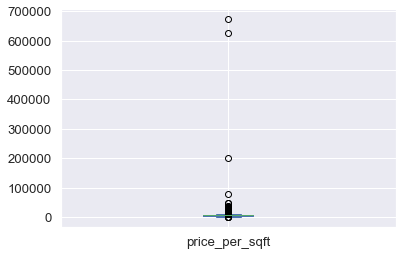

In [23]:
data.price_per_sqft.plot(kind='box')

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

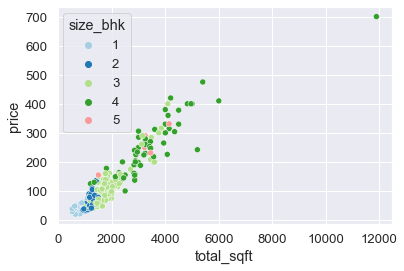

In [24]:
sns.scatterplot(x='total_sqft', y='price', \
                data=data.query("location=='Whitefield'"), \
                hue='size_bhk', palette='Paired')

## Create dummy variables


In [25]:
# Create dummy variables for location and area_type 
dummy_vars = pd.concat([pd.get_dummies(data.location_new),
                        pd.get_dummies(data.area_type)], axis='columns')
data_modeling = data.drop(columns=['location', 'location_new', 'area_type', 'availability',
                                  'size', 'total_sqft', 'price_per_sqft', 'threshup', 'threshlow'])
data_modeling = data_modeling.merge(dummy_vars, left_index=True, right_index=True)
data_modeling.head()

,bath,balcony,price,size_bhk,available,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2.0,1.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1.0,30.60,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,2.0,45.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,28.35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,35.23,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier, XGBRegressor

from matplotlib.ticker import MaxNLocator

In [28]:
features = list(data_modeling.columns)
features.remove('price')

In [29]:
X = data_modeling[features].values
y = data_modeling['price'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
models = modelutil.default_regressors()

model_results = modelutil.fit_eval_reg_models(models, X_train, y_train, X_test, y_test, 
                    transformation=None,
                    multilabel_method=None,
                    prob_type='binary',
                    cv_metric='neg_root_mean_squared_error')

100%|█████████████████████████████████████████████| 9/9 [07:12<00:00, 48.05s/it]


In [33]:
model_results

,model,mae,rmse,r2,explained_variance,max_error,10foldcv_mean_metric
0,Logistic Regression,42.61686,9094.606948,0.373309,0.37332,1735.697266,-99.842054
1,Decision Tree,38.438589,11036.214301,0.239517,0.239724,1715.0,-101.681229
2,Random Forest,35.787517,8414.186926,0.420196,0.420439,1723.981571,-94.890208
3,C-Support Vector,40.160478,10980.173869,0.243379,0.269003,1944.210461,-108.699948
4,XGBoost,35.853744,6850.132479,0.527971,0.528003,1668.594574,-89.757694
5,SGD,52.517024,10318.608698,0.288966,0.320537,1820.574608,-103.302425
6,ElasticNet,48.004366,11265.419263,0.223723,0.223844,1933.172966,-108.908978
7,KernelRidge,42.544635,9126.096267,0.37114,0.371158,1735.083096,-99.759424
8,BayesianRidge,42.543875,9190.690414,0.366688,0.366718,1734.312939,-99.870011


# Model Predictions Deep Dive

After using multiple regression models in the data, we can choose the model that performed better than the other models. We can say that the XGBoost Regressor outperformed the other models since it has the lowest errors and the highest r2 across the board.

In [76]:
model = models['XGBoost']
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [77]:
predictions = model.predict(X_test)
metrics.mean_squared_error(y_test, predictions)

6850.132478961603

## Hyperparameter Tuning

In [36]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
model2 = XGBRegressor(seed=42)

In [37]:
# Using only 5 iterations for faster modeling; n_iters can be a higher value
rgrsr = RandomizedSearchCV(estimator=model2,
                         param_distributions=params,
                         scoring='neg_root_mean_squared_error',
                         n_iter=5,
                         verbose=1)
rgrsr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=5,
                   param_distributions={'colsample_byle

In [39]:
print("best parameters:\n", rgrsr.best_params_)

best parameters:
 {'subsample': 0.7999999999999999, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7999999999999999}


In [40]:
print("best score:\n ", rgrsr.best_score_)

best score:
  -94.58606904827852


In [43]:
# Train model using best paramaters
model3 = XGBRegressor(seed=42, **rgrsr.best_params_)
model3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7999999999999999, colsample_bynode=1,
             colsample_bytree=0.4, enable_categorical=False, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, subsample=0.7999999999999999, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
predictions = model3.predict(X_test)
metrics.mean_squared_error(y_test, predictions)

6965.0876375466705

The RMSE is even higher than before we did the parameter tuning. We can later increase the iterations for a  chance of getting lower RMSE, but for now we'll use the first model which has a lower RMSE.

In [79]:
predictions = model.predict(X_test)
metrics.mean_squared_error(y_test, predictions)

6850.132478961603

## Predicted vs True Values

In [80]:
result = pd.DataFrame()
result['size_bhk'] = X_test[:, features.index('size_bhk')]
result['pred'] = np.round(predictions, 2)
result['target'] = y_test

In [81]:
result

,size_bhk,pred,target
0,2.0,60.380001,55.00
1,3.0,178.940002,200.00
2,4.0,223.949997,650.00
3,2.0,47.549999,46.55
4,2.0,58.680000,70.00
...,...,...,...
2479,3.0,100.830002,85.52
2480,2.0,55.389999,48.00
2481,2.0,55.389999,46.00
2482,4.0,207.660004,175.00


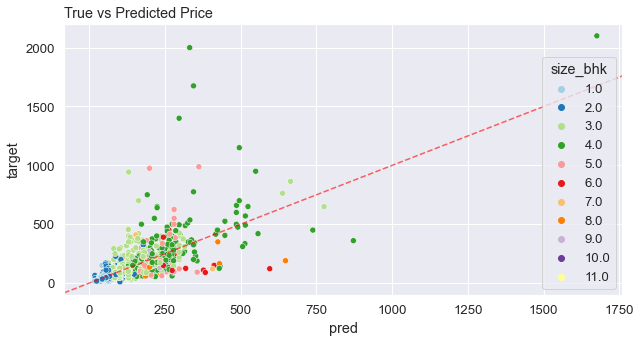

In [82]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pred', y='target', data=result, 
                hue='size_bhk', palette='Paired')
plt.axline((1, 1), slope=1, linestyle='--', color='red', alpha=0.6)
plt.title('True vs Predicted Price', loc='left')
plt.show()

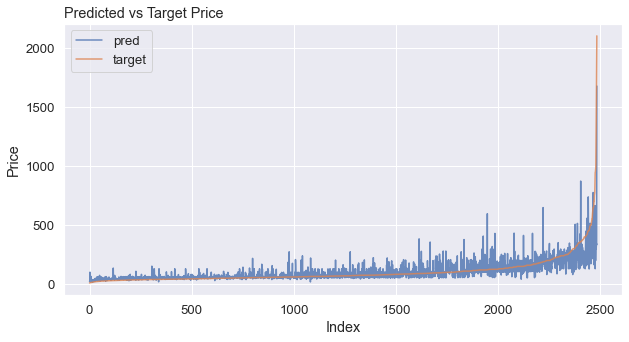

In [83]:
index = result.target.sort_values().index

plt.figure(figsize=(10,5))
result.pred.iloc[index.tolist()].reset_index().pred.plot(alpha=0.8, label='pred')
result.target.sort_values().reset_index().target.plot(alpha=0.8, label='target')

plt.ylabel('Price')
plt.xlabel('Index')
plt.title('Predicted vs Target Price', loc='left')
plt.legend()
plt.show()

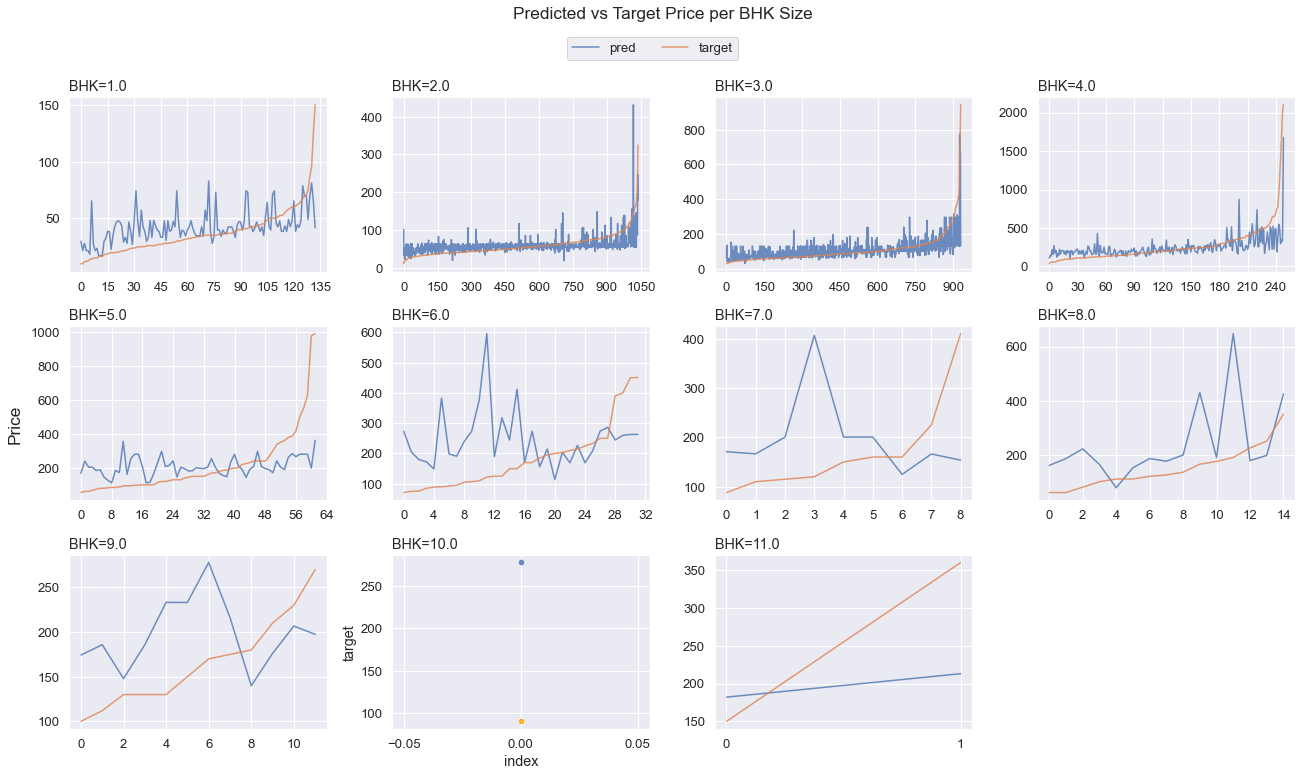

In [84]:
# Create subplots looking at predicted vs true value comparison
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18,10))

for size, ax in zip(sorted(result.size_bhk.unique()), axes.flatten()):
    df = result.query("size_bhk=={}".format(size)).reset_index()
    index = df.target.sort_values().index

    df.pred.iloc[index.tolist()].reset_index().pred.plot(ax=ax, alpha=0.8)
    df.target.sort_values().reset_index().target.plot(ax=ax, alpha=0.8)
    ax.set_title('BHK={}'.format(size), loc='left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Scatterplot for datapoints<2
    if len(index)<2:
        df.pred.iloc[index.tolist()].reset_index().plot(ax=ax, alpha=0.8, 
                                kind='scatter', x='index', y='pred', color='b')
        df.target.sort_values().reset_index().plot(ax=ax, alpha=0.8, 
                               kind='scatter', x='index', y='target', color='orange')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=2))
    

# Configure labels and legend
fig.delaxes(axes[2][3])
plt.tight_layout()
plt.suptitle("Predicted vs Target Price per BHK Size", y=1.08, 
             fontsize='larger')
fig.text(0, 0.5, 'Price', ha='center', va='center', 
         rotation='vertical', fontsize='large')
plt.legend(bbox_to_anchor=(-0.6,4), loc="upper left", ncol=2)
plt.show()

In [85]:
# Compute how much of the prediction are overestimated.
print("Our model is generally overestimating the price of the properties.\
      \n{}({}%) of the {} predictions are above the true price."\
      .format((result.pred>result.target).sum(),
              round((result.pred>result.target).sum()/result.shape[0]*100, 1),
              result.shape[0]))

# Compute over and underestimation per bhk size
est = result.groupby('size_bhk').apply(lambda x: 
      pd.Series({'Overestimated Count': (x.pred>x.target).sum(),
           'Rate': round((x.pred>x.target).sum()/x.shape[0]*100, 1),
           'Denominator': x.shape[0],
           'Mean Residual (Over)': round((x.pred-x.target)[(x.pred>x.target).values].mean(), 2),
           'Mean Residual (Under)': round((x.target-x.pred)[(x.pred<x.target).values].mean(), 2)}))

print("\nThe overestimation rates per BHK size is as follows:")
display(est)

Our model is generally overestimating the price of the properties.      
1516(61.0%) of the 2484 predictions are above the true price.

The overestimation rates per BHK size is as follows:


,Overestimated Count,Rate,Denominator,Mean Residual (Over),Mean Residual (Under)
size_bhk,,,,,
1.0,98.0,73.7,133.0,13.02,13.66
2.0,601.0,57.9,1038.0,13.85,19.01
3.0,580.0,62.3,931.0,28.50,43.24
4.0,146.0,58.6,249.0,68.55,140.67
5.0,40.0,64.5,62.0,86.38,161.88
6.0,23.0,71.9,32.0,127.50,99.73
7.0,6.0,66.7,9.0,100.32,116.80
8.0,12.0,80.0,15.0,122.04,43.93
9.0,8.0,66.7,12.0,69.70,42.44


In all the BHK sizes, the majority of the prices were overestimated by the model with a mean price difference of ₹13-188 above the true property price. The remaining 39% of the test set that where underestimated by model deviates from the true property price by ₹14-162 on average below the true value.

## Model Interpretation

### Feature Importance

In [86]:
# Top 15 most important features
index = model.feature_importances_.argsort()[::-1][:15]
feat_nm = [features[i] for i in index]
feat_scores = [model.feature_importances_[i] for i in index]

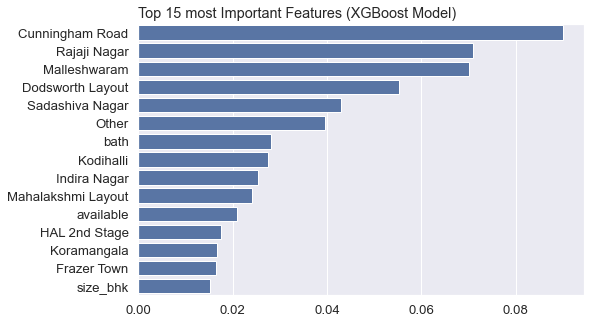

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(y=feat_nm, x=feat_scores, orient='h', color='b')
plt.title('Top 15 most Important Features (XGBoost Model)',
         loc='left')
plt.show()

The above features are the best variables that split the dataset to make a correct prediction during training, and thus, are necessary features in making predictions on the test set.

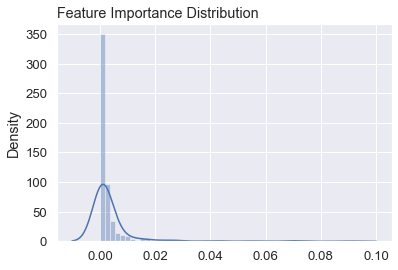

In [88]:
sns.distplot(model.feature_importances_)
plt.title('Feature Importance Distribution', loc='left')
plt.show()

In [89]:
val0 = sum(model.feature_importances_==0)

print("{}({}%) out of the {} features have feature importance equal to zero."\
     .format(val0, round(val0/len(features)*100, 2), len(features)))

109(41.6%) out of the 262 features have feature importance equal to zero.


In [90]:
# Other available importance metrics: 
# importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = 'gain'
scores = model.get_booster().get_score(importance_type= f)
sorted(scores.items(), key=lambda x: x[1], reverse=True)[:15]

[('f74', 382651.28125),
 ('f211', 301612.6875),
 ('f177', 298266.53125),
 ('f83', 235034.59375),
 ('f216', 182421.5625),
 ('f200', 167930.15625),
 ('f0', 119587.390625),
 ('f158', 117319.84375),
 ('f124', 107978.9140625),
 ('f174', 102574.078125),
 ('f3', 88651.203125),
 ('f101', 74461.5546875),
 ('f161', 71408.34375),
 ('f90', 70012.265625),
 ('f2', 65054.1796875)]

### SHAP Value

In [91]:
import shap

In [92]:
# Make sure the SHAP values add up to marginal predictions
pred = model.predict(X_test, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test, y_test)

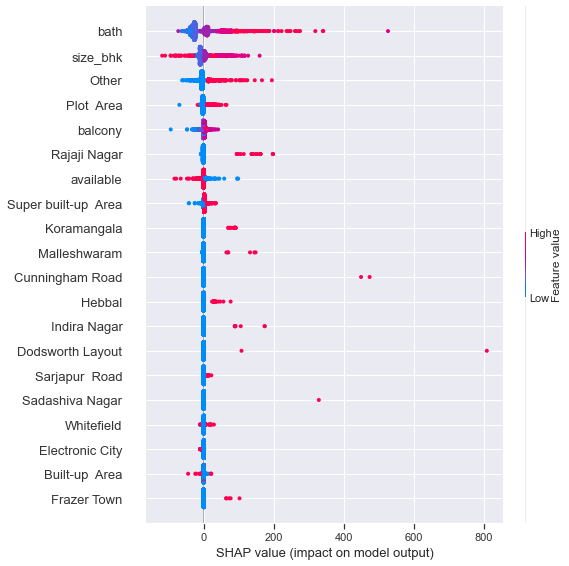

In [107]:
shap.summary_plot(shap_values, X_test, feature_names=features)

The summary plot of the SHAP values shows the top features that influence the model's prediction. For instance, for the top feature, `bath`, a higher value for this variable leads the model to predict a higher price for the property (more bathrooms, more expensive property). On the other hand, the `size_bhk` does not have a definite impact on the model's prediction. A high BHK value does not automatically tells whether the model should predict a high or low price. Meanwhile, those in the `Rajaji Nagar` are predicted to have higher prices. However, interestingly, when `available` is higher (value=1, property is available), the price prediction of the model becomes lower.

In [113]:
shap.initjs() #

idx=0
shap.force_plot(
    explainer.expected_value,
    shap_values[idx, :],
    X_test[idx, :],
    feature_names=features
)

For this sample data point, the predicted price of the model is 60.38. 
The model reduced the predicted price from the base value because the area type is not `Plot Area`, it's not in the `Other` location, the `size_bhk` is 2, and it has only 2 `bath`. However, being in `Nagarbhavi` pushed the predicted price higher, leading to the 60.38 price prediction.